## Problem Set 1 
### Made by student of SkolTech German Devchich

In some portions of this document (not exceeding 15% of the entire text) Artificial Intelligence assistant, particularly Generative AI, has been used to improve, rephrase, shorten, or summarize the content. The technologies used include ChatGPT-4o

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set_theme(style="dark")  
# 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

**A. (5 pts)** Plot the probability density function p(x) of a one dimensional Gaussian distribution **N(x; 1,1).**
Hint: you might want to look at the library scipy.stats and use the function norm.pdf().

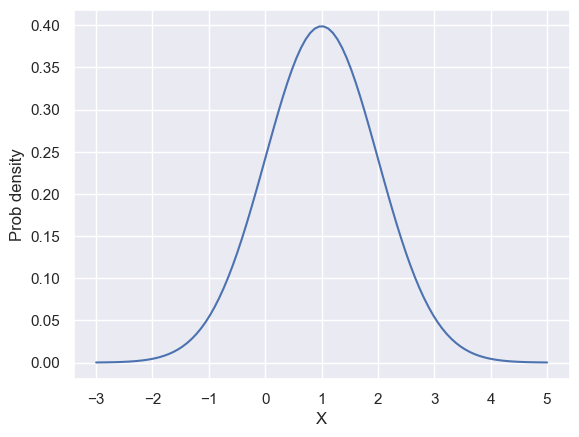

In [74]:
# plt.gca().set_aspect('equal')
x = np.linspace(-3,5,100)
y = stats.norm.pdf(x,1,1)

plt.plot(x,y)
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.grid(True)
plt.show()

**B. (5 pts)** Calculate the probability mass that the random variable X is less than 0, that is, Pr{X $\leq$ 0} $\int_{-\infty}^0 p(x)dx $ 

Hint: you might want to use the function norm.cdf().

Probability mass from -inf to 0 is : 0.15866


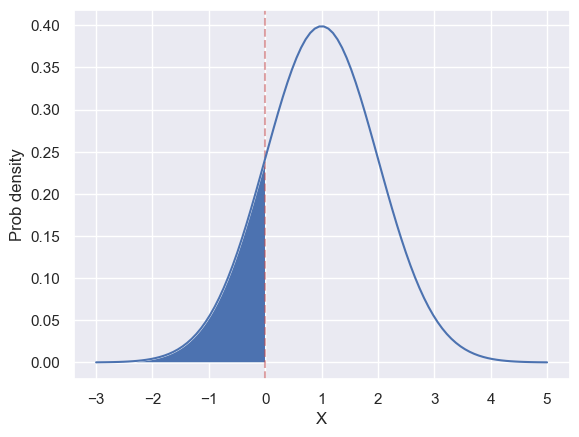

In [75]:
prob_mass = stats.norm.cdf(0,loc=1, scale=1) - stats.norm.cdf(-np.inf,loc=1, scale=1 )
print(f"Probability mass from -inf to 0 is : {np.round(prob_mass,5)}")

plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

tmp = np.linspace(-3,0)
y_tmp = stats.norm.pdf(tmp,1,1)
plt.fill_between(tmp,y_tmp)

plt.plot(x,y)
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.grid()
plt.show()

**C. (5 pts)** Consider the new observation variable $ z $, it gives information about the variable $ x $ by the likelihood function $ p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) $, with variance $ \sigma^2 = 0.2 $. Apply the Bayes’ theorem to derive the posterior distribution, $ p(x|z) $, given an observation $ z = 0.75 $ and plot it. For a better comparison, plot the prior distribution, $ p(x) $, too.

### Bayes' theorem:
$
p(x | z ) = \frac{p(z | x) p(x)}{p(z)}
$


$
p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) \\
$

Prior distribution 
$
p(x) = \mathcal{N}(x; 1,1) 
$


<!-- $$
p(x | z) \propto e^{-\left( \frac{x^2}{2\sigma_0^2} - \frac{2\mu_0 x}{2\sigma_0^2} + \frac{x^2}{2\sigma^2} - \frac{2z x}{2\sigma^2} \right)}
$$ -->


$$
f(x) = A_1 A_2 e^{-\frac{x^2}{2} \left( \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2} \right) + x \left( \frac{\mu_1}{\sigma_1^2} + \frac{\mu_2}{\sigma_2^2} \right) - \frac{\mu_1^2}{2\sigma_1^2} - \frac{\mu_2^2}{2\sigma_2^2} }
$$

If $(x) = \mathcal{N}(x; \mu_0,\sigma_0^2)$ and $p(z \mid x) = \mathcal{N}(z; x,\sigma^2$,
Then the posterior $p(x \mid z)$ is also a Gaussian with mean
$$
\mu_{\text{post}} \;=\;
\frac{\sigma_0^2}{\sigma_0^2 + \sigma^2}\,z \;+\;
\frac{\sigma^2}{\sigma_0^2 + \sigma^2}\,\mu_0.
$$
and the variance
$$
\sigma_{\text{post}}^2 \;=\;
\frac{\sigma_0^2\,\sigma^2}{\sigma_0^2 + \sigma^2}.
$$

Another way to calculate use a numerical integration:
$$

p(x\mid z)\;=\;\frac{p(z\mid x)\,p(x)}{\int p(z\mid x')\,p(x')\,dx'}.
$$


In [76]:
sig_0_2 = 1
sig_z_2 = 0.2
mean_0 = 1
mean_z = x

z = 0.75

mean_post = (sig_0_2 / (sig_0_2 + sig_z_2)) * z + (sig_z_2 / (sig_0_2 + sig_z_2)) * mean_0
sig_post_2 = (sig_0_2 * sig_z_2) / (sig_z_2 + sig_0_2)
print(f"Expectation of posterior : {mean_post}")
print(f"Variance of posterior : {sig_post_2}")


def calculate_normalisation_coef():
    x = np.linspace(-1000,1000,100000)
    p_x = stats.norm.pdf(x,mean_0,np.sqrt(sig_0_2))
    p_z_x = stats.norm.pdf(z,x,np.sqrt(sig_z_2))
    dx = x[1] - x[0]
    coef = np.sum(p_z_x * p_x) * dx
    return coef
print(calculate_normalisation_coef())


Expectation of posterior : 0.7916666666666667
Variance of posterior : 0.16666666666666669
0.3548213064777798


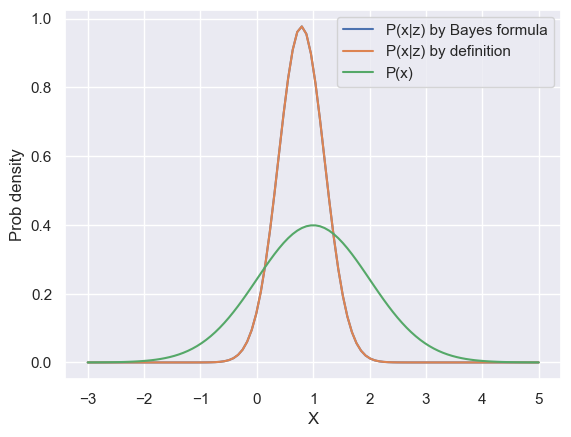

Is P(x|z) by Bayes formula close to P(x|z) by definition: True


In [77]:
# p_x_z_ = stats.norm.pdf(x,mean_post,np.sqrt(sig_post_2)) / calculate_normalisation_coef()
p_x = stats.norm.pdf(x,mean_0,np.sqrt(sig_0_2))
p_z_x = stats.norm.pdf(z,x,np.sqrt(sig_z_2))
p_x_z_def = p_z_x * p_x / calculate_normalisation_coef()

p_x_z_form = stats.norm.pdf(x, mean_post , np.sqrt(sig_post_2))
plt.plot(x,p_x_z_form, label = "P(x|z) by Bayes formula")
plt.plot(x,p_x_z_def, label = "P(x|z) by definition")
plt.plot(x,p_x, label = "P(x)")
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.legend()
plt.grid()
plt.show()
print(f"Is P(x|z) by Bayes formula close to P(x|z) by definition: {np.all(np.isclose(p_x_z_def,p_x_z_form))}")

## Task 2: Multivariate Gaussian (35 points)

A. (15 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean,covariance, and the iso-contour value k. You may add any other parameter such as color, number of points,etc.
Then, use $\texttt{plot2dcov}$ to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions:
$ 
\mathcal{N} \left( 
\begin{bmatrix} 0 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} 
\right),
\quad
\mathcal{N} \left( 
\begin{bmatrix} 5 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 3 & -0.4 \\ -0.4 & 2 \end{bmatrix} 
\right)
\quad \text{and} \quad
\mathcal{N} \left( 
\begin{bmatrix} 2 \\ 2 \end{bmatrix}, 
\begin{bmatrix} 9.1 & 6 \\ 6 & 4 \end{bmatrix} 
\right).
$
Use the $\texttt{set\_aspect('equal')}$ command and comment on them.

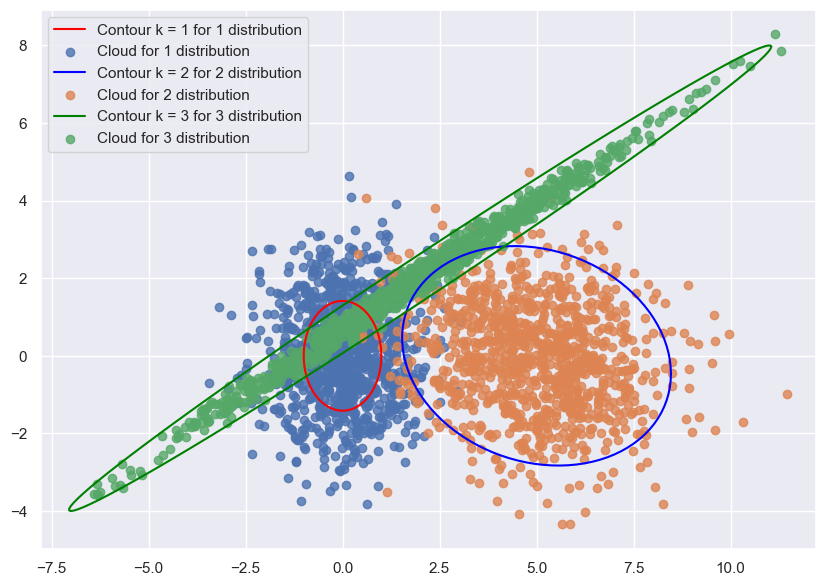

In [78]:
from numpy.linalg import cholesky
from numpy.linalg import svd

def plot2dcov(mean: np.array, covariance: np.array, k: int,method: str = "SVD",num_points: int = 30):

    angles = np.linspace(0, np.pi*2, num_points)
    points = np.hstack([np.cos(angles)[:, None], np.sin(angles)[:, None]]) * float(k)

    if method == "SVD":
        u, s, vh = svd(covariance)
        A = u @ np.diag(np.sqrt(s))
    elif method == "cholesky":
        A = cholesky(covariance)
    cloud = (A @ points.T + mean).T
    return cloud

mean_1 = np.array([
    [0],
    [0]
])
cov_1 = np.array([
    [1, 0.0],
    [0.0, 2]
    ])

mean_2 = np.array([
    [5],
    [0]
])
cov_2 = np.array([
    [3, -0.4],
    [-0.4, 2]
    ])

mean_3 = np.array([
    [2],
    [2]
])
cov_3 = np.array([
    [9.1, 6.0],
    [6.0, 4]
    ])
colors = ['red', 'blue', 'green']
cloud_1_contour = plot2dcov(mean=mean_1, covariance=cov_1, k=1,num_points=100,method='cholesky')

cloud_1_points = np.random.multivariate_normal(mean=mean_1.reshape(2),cov=cov_1,size=1000)

cloud_2_contour = plot2dcov(mean=mean_2, covariance=cov_2, k=2,num_points=100,method='cholesky')

cloud_2_points = np.random.multivariate_normal(mean=mean_2.reshape(2),cov=cov_2,size=1000)

cloud_3_contour = plot2dcov(mean=mean_3, covariance=cov_3, k=3,num_points=100,method='cholesky')

cloud_3_points = np.random.multivariate_normal(mean=mean_3.reshape(2),cov=cov_3,size=1000)

plt.figure(figsize=(10,7))
plt.plot(cloud_1_contour[:,0], cloud_1_contour[:,1],label='Contour k = 1 for 1 distribution',color = colors[0])
plt.scatter(cloud_1_points[:, 0], cloud_1_points[:, 1],alpha=0.8, label='Cloud for 1 distribution')

plt.plot(cloud_2_contour[:,0], cloud_2_contour[:,1],label='Contour k = 2 for 2 distribution',color = colors[1])
plt.scatter(cloud_2_points[:, 0], cloud_2_points[:, 1],alpha=0.8, label='Cloud for 2 distribution')

plt.plot(cloud_3_contour[:,0], cloud_3_contour[:,1],label='Contour k = 3 for 3 distribution',color = colors[2])
plt.scatter(cloud_3_points[:, 0], cloud_3_points[:, 1],alpha=0.8, label='Cloud for 3 distribution')
plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

B. (5 pts) Write the equation of sample mean and sample covariance of a set of points ${x_i}$, in vector form as was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.

## Sample mean:
$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

## Sample variance:
$$
\bar{\Sigma}_x = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x}) (x_i - \bar{x})^T
$$

C. (15 pts) Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $\mathcal{N}(0,1)$. In particular, draw and plot 200 samples from 

$$
\mathcal{N} \left( 
\begin{bmatrix} 2 \\ 2 \end{bmatrix}, 
\begin{bmatrix} 1 & 1.3 \\ 1.3 & 3 \end{bmatrix} 
\right)
$$

also plot their corresponding 1-sigma iso-contour. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try a different number of samples (e.g. 50, 400). Comment briefly on the results.

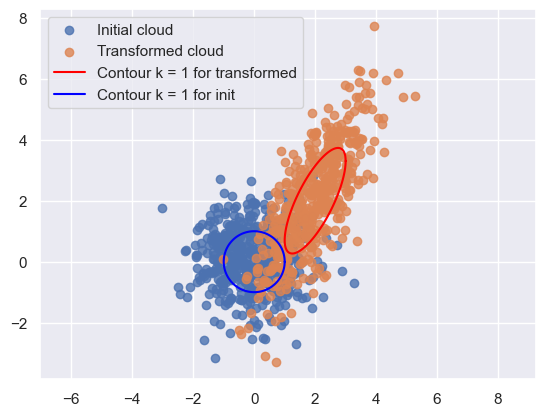

In [79]:
number_samples = 500
x = np.random.normal(loc=0,scale=1,size=(number_samples,2))
cov = np.array([
    [1,1.3],
    [1.3,3]
])
mean = np.array([
    [2],
    [2]
])
A = cholesky(cov)
transformed  = (A @ x.T + mean).T
cloud_transformed_contour = plot2dcov(mean=mean, covariance=cov, k=1,num_points=100,method='cholesky')
cloud_init_contour = plot2dcov(mean=np.zeros(shape=(2,1)), covariance=np.eye(2), k=1,num_points=100,method='cholesky')
plt.scatter(x[:,0], x[:,1],alpha=0.8, label='Initial cloud')
plt.scatter(transformed[:,0], transformed[:,1],alpha=0.8, label='Transformed cloud')
plt.plot(cloud_transformed_contour[:,0], cloud_transformed_contour[:,1],label='Contour k = 1 for transformed',color = colors[0])
plt.plot(cloud_init_contour[:,0], cloud_init_contour[:,1],label='Contour k = 1 for init' ,color = colors[1])

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

## Task 3 
A. (5 pts) Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform.

$
\mu_t = E[x_t] = E[x_{t-1} + \Delta t A_t + \varepsilon_t]
$

Due to the fact that $E[\varepsilon_t] = 0$ 


We have $\mu_t = \mu_{t-1} + \Delta t A_t$



$
\Sigma_t = E[(x_t - \mu_t)(x_t - \mu_t)^T] =
$

$
E[(x_{t-1} - \mu_{t-1} + \varepsilon_t)(x_{t-1} - \mu_{t-1} + \varepsilon_t)^T] = 
E[(x_{t-1} - \mu_{t-1})(x_{t-1} - \mu_{t-1})^T] + E[\varepsilon_t \varepsilon_t^T]
$

Since the noise $\varepsilon_t$ is state independent, then:
$
E[(x_{t-1} - \mu_{t-1}) \varepsilon_t^T] = 0
$

$
\Sigma_t = \Sigma_{t-1} + R
$

$
x_t \sim \mathcal{N}(\mu_t, \Sigma_t) = \mathcal{N}(\mu_{t-1} + \Delta t A_t, \Sigma_{t-1} + R)
$

B. (5 pts) Show how to use this result iteratively for multiple propagations.

Now we have: $\mu_t = \mu_{t-1} + \Delta t A_t$ and $\Sigma_t = \Sigma_{t-1} + R$

Lets imagine that we propagating the system on n - steps forward 

$
x_t = x_0 + \sum_{i=1}^{t} (\Delta t A_i) + \sum_{i=1}^{t} \varepsilon_i
$

Each step adds $\Delta t A_t $, so after n steps:
$
\mu_n = \mu_0 + n \cdot \Delta t A
$

Each step increases the covariance by R , so:
$
\Sigma_n = \Sigma_0 + n \cdot R
$

Final distribution is: $
x_n \sim \mathcal{N}(\mu_0 + n\Delta t A, \Sigma_0 + n R)
$

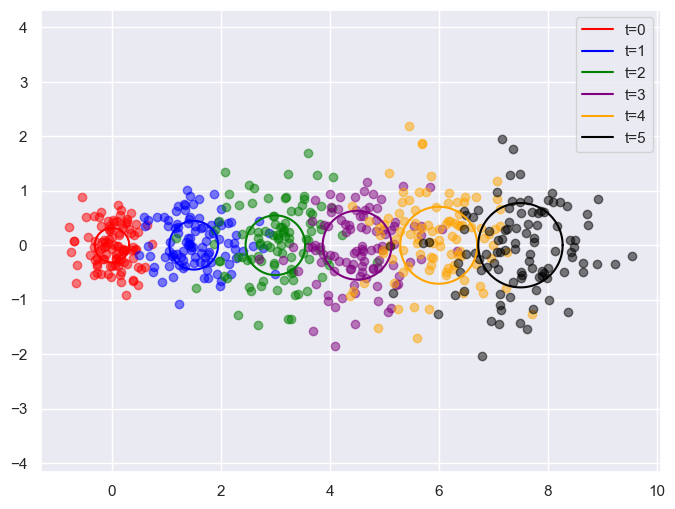

In [123]:
mu_0 = np.array([0, 0])  
Sigma_0 = np.array([[0.1, 0], 
                    [0, 0.1]])  
A = np.array([3, 0])  
dt = 0.5
R = np.array([[0.1, 0], 
              [0, 0.1]]) 

def plot_ellipse(mean, cov, color='red', label=None):
    angles = np.linspace(0, 2 * np.pi, 100)
    circle = np.array([np.cos(angles), np.sin(angles)]) 
    L = cholesky(cov) 
    ellipse = (L @ circle + mean[...,np.newaxis]).T 
    plt.plot(ellipse[:, 0], ellipse[:, 1], color=color, label=label)

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for t in range(6):
    mu_t = mu_0 + t * dt * A
    Sigma_t = Sigma_0 + t * R
    plot_ellipse(mu_t, Sigma_t, color=colors[t], label=f"t={t}")
    samples = np.random.multivariate_normal(mu_t, Sigma_t, size=100)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[t], alpha=0.5)

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

**D. (8 pts)** Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed:

$$
\begin{bmatrix} x \\ y \end{bmatrix}_t =
\begin{bmatrix} 1 & 0 \\ 0.1 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}_{t-1} +
\begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix}
\begin{bmatrix} v_x \\ v_y \end{bmatrix}_t +
\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t.
$$

All the other parameters and controls are the same as defined earlier.

Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for time indexes $t = 0, \dots, 5$ in the same figure.

Now we have a dynamic: $
\begin{bmatrix} x \\ y \end{bmatrix}_t =
\begin{bmatrix} 1 & 0 \\ 0.1 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}_{t-1} +
\begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix}
\begin{bmatrix} v_x \\ v_y \end{bmatrix}_t +
\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t
$

Transformation Matrix:
$F = \begin{bmatrix} 1 & 0 \\ 0.1 & 1 \end{bmatrix}$

Noise the same:
$ 
\eta_t \sim \mathcal{N} \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix},
\begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix} \right)
$

Since, the expectation can be calculated:

$$
X_t = F X_{t-1} + \Delta t \, U_t + \epsilon_t
$$

$$
E \{ X_t \} = E \{ F X_{t-1} \} + E \{ \Delta t U_t \} + E \{ \epsilon_t \}
$$

$$
= F \mu_{t-1} + \Delta t U_t + 0
$$

The covariance matrix:
$ 
\Sigma_t = F \Sigma_{t-1} F^T + R
$

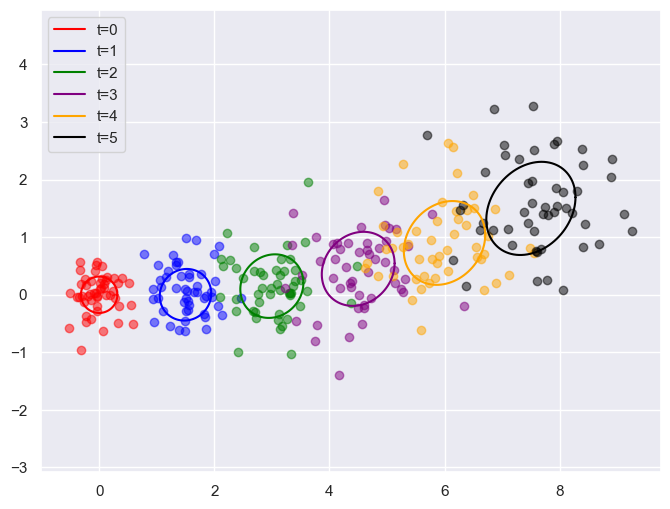

In [124]:
def plot_ellipse(mean, cov, color='red', label=None):
        angles = np.linspace(0, 2 * np.pi, 100)
        circle = np.array([np.cos(angles), np.sin(angles)]) 
        L = cholesky(cov) 
        ellipse = (L @ circle + mean[..., np.newaxis]).T 
        plt.plot(ellipse[:, 0], ellipse[:, 1], color=color, label=label)

def propagate_system(mean: np.array, 
                     cov: np.array, 
                     n_steps: int,
                     cov_noise: np.array,
                     F: np.array, 
                     B: np.array, 
                     control: np.array):
    for _ in range(n_steps):
        mean = F @ mean + B @ control 
        cov = F @ cov @ F.T + cov_noise
    return mean, cov

mu_0 = np.array([0, 0])  
Sigma_0 = np.array([[0.1, 0], 
                    [0, 0.1]])  
A = np.array([3, 0])  
dt = 0.5
R = np.array([[0.1, 0], 
              [0, 0.1]]) 

F = np.array([[1, 0], 
              [0.1, 1]])

B = np.array([[dt, 0], 
              [0, dt]])

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for t in range(6):
    mu_t, Sigma_t = propagate_system(mu_0, Sigma_0, t, R, F, B, A)
    plot_ellipse(mu_t, Sigma_t, color=colors[t], label=f"t={t}")
    samples = np.random.multivariate_normal(mu_t, Sigma_t, size=50)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[t], alpha=0.5)

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()